In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
%matplotlib inline

In [6]:
data = pd.read_csv('./EU-referendum-result-data.csv') # Remember to write your path

In [7]:
data_area = data.groupby('Area').sum()

<Figure size 1440x1440 with 0 Axes>

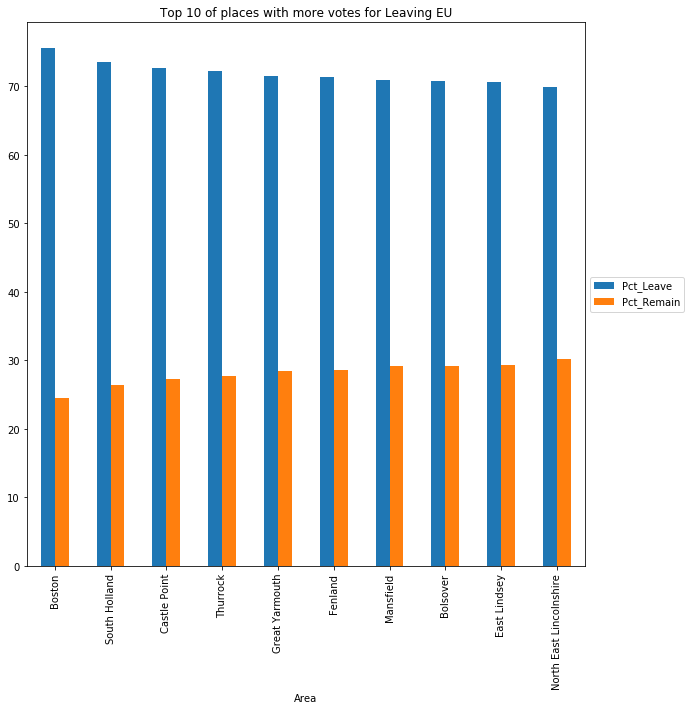

In [8]:
plt.figure(figsize=(20,20))
top5_noUE = data_area[['Pct_Leave','Pct_Remain']].sort_values(by='Pct_Leave', ascending=False)[0:10]
top5_noUE.head()
plt1 = top5_noUE.plot(kind="bar",figsize=(10,10),title='Top 10 of places with more votes for Leaving EU')
plt1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<Figure size 1440x1440 with 0 Axes>

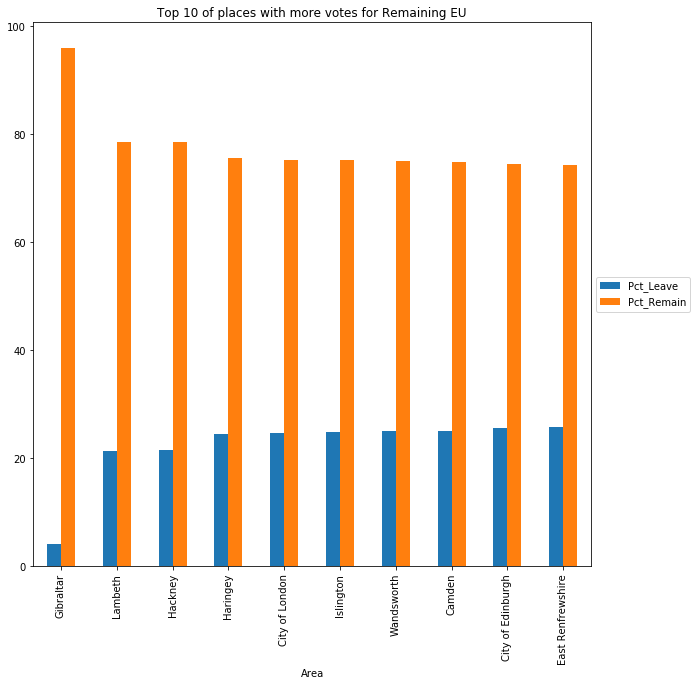

In [9]:
plt.figure(figsize=(20,20))
top5_yesUE = data_area[['Pct_Leave','Pct_Remain']].sort_values(by='Pct_Leave', ascending=True)[0:10]
top5_yesUE.head()
plt1 = top5_yesUE.plot(kind="bar",figsize=(10,10),title='Top 10 of places with more votes for Remaining EU')
plt1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [10]:
# REMEMBER TO WRITE YOUR PATH HERE
census_data = {
'age' : './r21ewrttableks102ewladv1_tcm77-290566.xls',
'unemployment' : './r21ewrttableks601ewladv1_tcm77-290745.xls',
'education' : './r21ewrttableks501ewladv1_tcm77-290734.xls',
'outside_uk' : './r21ewrttableqs203ewladv1_tcm77-290919.xls',
'salaries' : './Table_3_13_14.xlsx'
}

In [11]:
data_org = data[['Area_Code','Region','Remain','Leave']]

In [12]:
data_org.rename(index=str,inplace=True,columns= {'Area_Code':'Area code'})

/home/gersonp/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [13]:
data_org['votes'] = data_org['Remain'] - data_org['Leave'] 

/home/gersonp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
age = pd.read_excel(io=census_data['age'], sheetname='KS102EW_Numbers', header=10, usecols=('A,W'), skiprows=[11,12,13])
age.dropna(how='all', inplace=True)
age.rename(index=str, inplace=True, columns={'Median age': 'Median_Age', })

/home/gersonp/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [15]:
unemployment = pd.read_excel(io=census_data['unemployment'], sheetname='KS601EW_Numbers', header=10, usecols=('A,E,I'), skiprows=[11,12,13])
unemployment.dropna(how='all', inplace=True)
unemployment['Pct_Unemployed'] = unemployment[unemployment.columns[2]] /unemployment[unemployment.columns[1]]
unemployment = unemployment[['Area code','Pct_Unemployed']]

In [16]:
education = pd.read_excel(io=census_data['education'], sheetname='KS501EW_Numbers', header=10, usecols=('A,E,J,K'), skiprows=[11,12,13])
education.dropna(how='all', inplace=True)
education['Pct_High_Education'] = (education[education.columns[2]] + education[education.columns[3]]) / education[education.columns[1]]
education = education[['Area code', 'Pct_High_Education']]

In [17]:
outside_uk = pd.read_excel(io=census_data['outside_uk'], sheetname='QS203EW_Numbers', header=10, usecols=('A,E,G'), skiprows=[11,12,13])
outside_uk.dropna(how='all', inplace=True)
outside_uk['Pct_Born_Outside_UK'] = (outside_uk[outside_uk.columns[1]] - outside_uk[outside_uk.columns[2]]) / outside_uk[outside_uk.columns[1]]
outside_uk = outside_uk[['Area code', 'Pct_Born_Outside_UK']]

In [18]:
salaries = pd.read_excel(io=census_data['salaries'], sheetname='Table_3_13_14', header=10, usecols=('A,U'), skiprows=[11,12,13],skipfooter=61)
salaries.dropna(how='all', inplace=True)
salaries.rename(index=str, columns={salaries.columns[0]: 'Region', salaries.columns[1]: 'median_income'}, inplace=True)
salaries.set_index('Region', inplace=True)

In [19]:
data_full = data_org.merge(age, on='Area code').merge(unemployment, on='Area code').merge(education, on='Area code').merge(outside_uk, on='Area code')

In [20]:
regions = pd.factorize(data_full['Region'])

In [21]:
data_full['Region_Code'] = regions[0]

In [22]:
data_full

,Area code,Region,Remain,Leave,votes,Median_Age,Pct_Unemployed,Pct_High_Education,Pct_Born_Outside_UK,Region_Code
0,E06000031,East,34176,53216,-19040,35.0,0.050568,0.310281,0.206349,0
1,E06000032,East,36708,47773,-11065,32.0,0.057414,0.333318,0.309408,0
2,E06000033,East,39348,54522,-15174,40.0,0.049669,0.332425,0.098596,0
3,E06000034,East,22151,57765,-35614,36.0,0.054239,0.283631,0.119692,0
4,E06000055,East,41497,44569,-3072,39.0,0.044478,0.399608,0.176049,0
5,E06000056,East,69670,89134,-19464,40.0,0.034518,0.399126,0.079129,0
6,E07000008,East,42682,15117,27565,31.0,0.026871,0.642524,0.293710,0
7,E07000009,East,23599,24487,-888,40.0,0.028774,0.404306,0.098332,0
8,E07000010,East,15055,37571,-22516,43.0,0.042320,0.252644,0.086173,0
9,E07000011,East,45729,54198,-8469,41.0,0.031569,0.403027,0.096172,0


In [23]:
def showplot(data, factor,factor2):
  fig = plt.figure(figsize=(6, 6))
  ax = fig.add_subplot(1,1,1)
  ax.scatter(data['votes'], data[factor], s=20, c='red', marker="o", label=factor2,alpha=0.6)
  plt.legend(loc='upper left');
  plt.xlabel('Votes (< 0 = noEU | > 0 = yesEU)')
  plt.ylabel(factor2)
  plt.axvline(x=0)
  plt.axhline(y=data[factor].mean())
  plt.show()

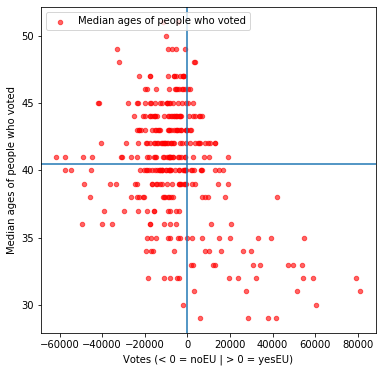

In [24]:
showplot(data_full,'Median_Age','Median ages of people who voted')
# Young people would have prefered remainin in EU

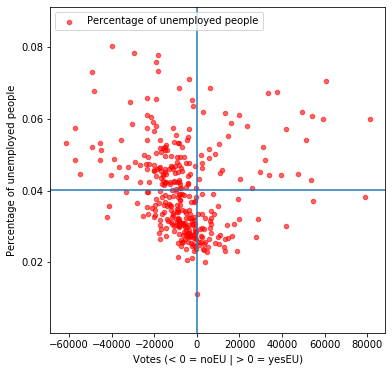

In [25]:
showplot(data_full,'Pct_Unemployed','Percentage of unemployed people')
#Places with more Percentage of unemployment prefered leaving EU

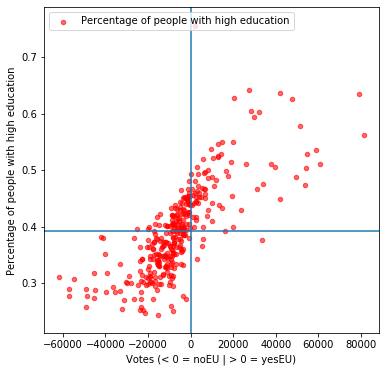

In [26]:
showplot(data_full,'Pct_High_Education','Percentage of people with high education')
# People with high education prefered remaining EU

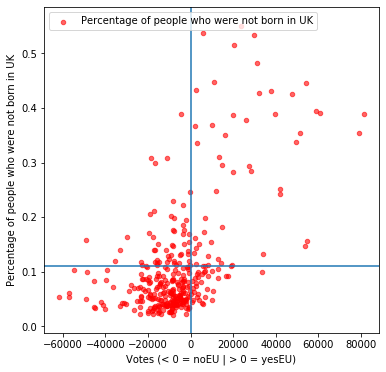

In [27]:
showplot(data_full,'Pct_Born_Outside_UK','Percentage of people who were not born in UK')
#People who were born in UK prefered leaving UE

In [28]:
data_region = data_full.groupby('Region').sum()
salaries.index = salaries.index.str.strip()
votes_and_income = data_region.merge(salaries, left_index=True, right_index=True, how='left')
votes_and_income['median_income'][0],votes_and_income['median_income'][-1] = 22900,20400
votes_and_income

/home/gersonp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Remain,Leave,votes,Median_Age,Pct_Unemployed,Pct_High_Education,Pct_Born_Outside_UK,Region_Code,median_income
Region,,,,,,,,,
East,1305827,1746950,-441123,1757.0,1.620432,15.702064,4.513288,0,22900.0
East Midlands,1033036,1475479,-442443,1653.0,1.538110,14.566119,3.110987,40,20800.0
London,2263519,1513232,750287,1121.0,1.674590,16.262047,12.014834,66,25600.0
North East,436144,622875,-186731,399.0,0.596923,3.446453,0.511607,30,20400.0
North West,1699020,1966925,-267905,1581.0,1.703708,14.309155,2.663806,156,20600.0
South East,2391718,2567965,-176247,2722.0,2.260427,28.524379,7.863904,335,23900.0
South West,1483697,1668888,-185191,1616.0,1.138305,14.886172,2.545187,222,21200.0
Wales,772347,854572,-82225,917.0,0.955830,7.927642,1.053895,154,20300.0
West Midlands,1207175,1755687,-548512,1225.0,1.295326,10.933877,2.339834,240,20500.0


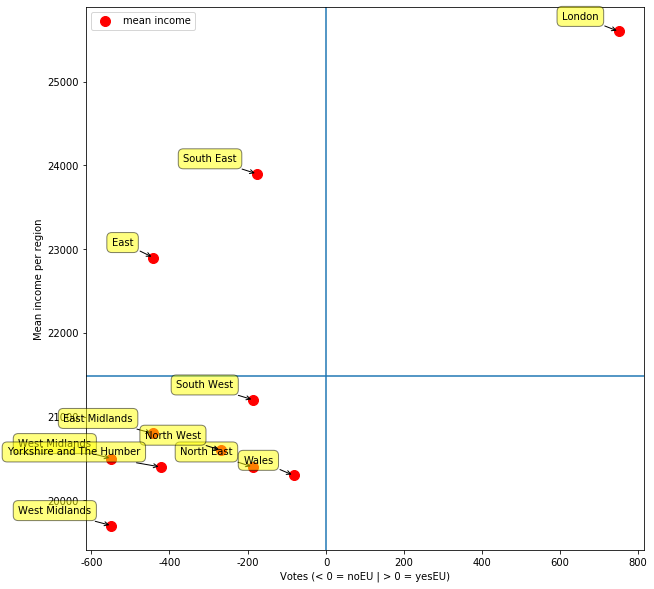

In [29]:
factor = 'median_income'
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)
ax.scatter(votes_and_income['votes'], votes_and_income[factor], s=100, c='r', marker="o", label="mean income")
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: ('%2d')%(y*1e-3)))
labels =votes_and_income.index
for label, x, y in zip(labels, votes_and_income['votes'], votes_and_income[factor]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='top',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict( arrowstyle = '->',connectionstyle='arc3,rad=0'))
plt.legend(loc='upper left')
plt.xlabel('Votes (< 0 = noEU | > 0 = yesEU)')
plt.ylabel('Mean income per region')
plt.axvline(x=0)
plt.axhline(y=votes_and_income[factor].mean())
plt.show()
# London with the highest mean income of the places shown, prefered remaing EU

In [30]:
clasf = []
for i in data_full['votes'].to_list():
    if i > 0:
        clasf.append('Yes EU')
    else:
        clasf.append('No EU')
clasf = pd.Series(clasf)
clasf.index=data_full.index

In [31]:
data_final = data_full[['Median_Age','Pct_Unemployed', 'Pct_High_Education', 'Pct_Born_Outside_UK']]

In [32]:
data_final = pd.concat((data_final,clasf),axis=1)

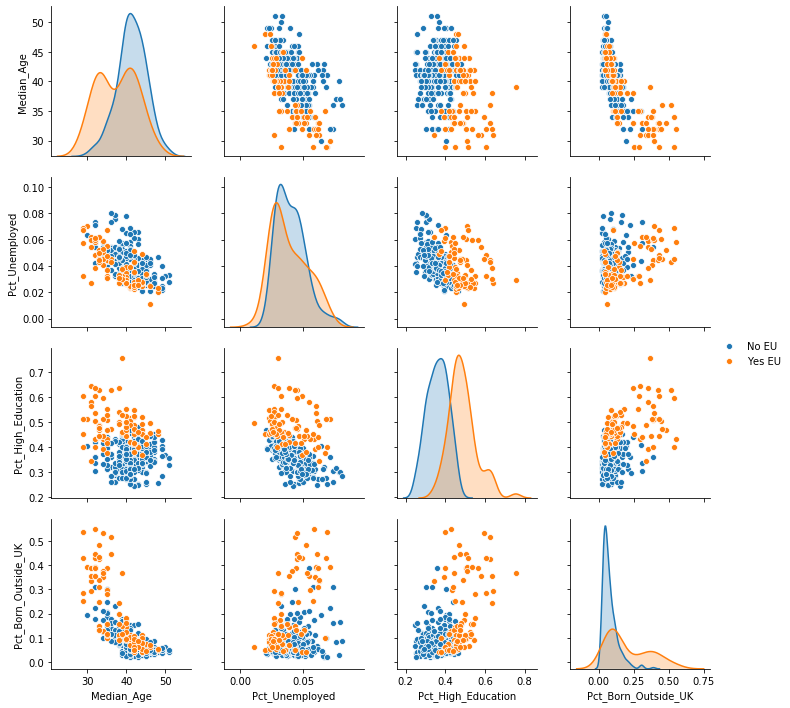

In [33]:
sns.pairplot(data_final, hue =0,vars=['Median_Age','Pct_Unemployed', 'Pct_High_Education', 'Pct_Born_Outside_UK'])
# Those who wanted to leave EU had this description
#they were older than 40 years old, living in places with a high percentage of unemployment
#and were born in UK